In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
users = pd.read_csv("users.csv")
repos = pd.read_csv("repositories.csv")

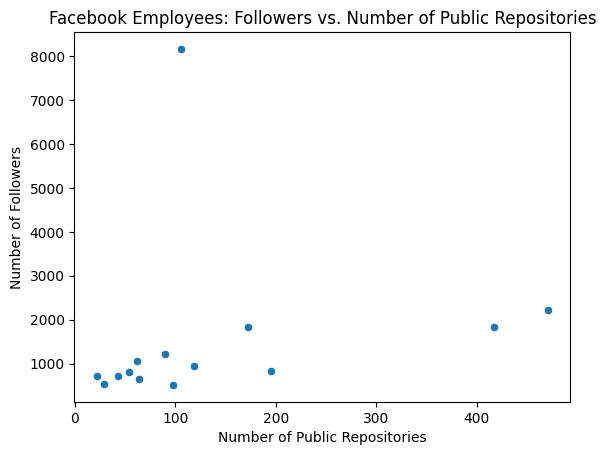

In [4]:
df = users

facebook_users = df[df["company"].str.contains("FACEBOOK", case=False, na=False)]

sns.scatterplot(data=facebook_users, x="public_repos", y="followers")
plt.xlabel("Number of Public Repositories")
plt.ylabel("Number of Followers")
plt.title("Facebook Employees: Followers vs. Number of Public Repositories")
plt.show()

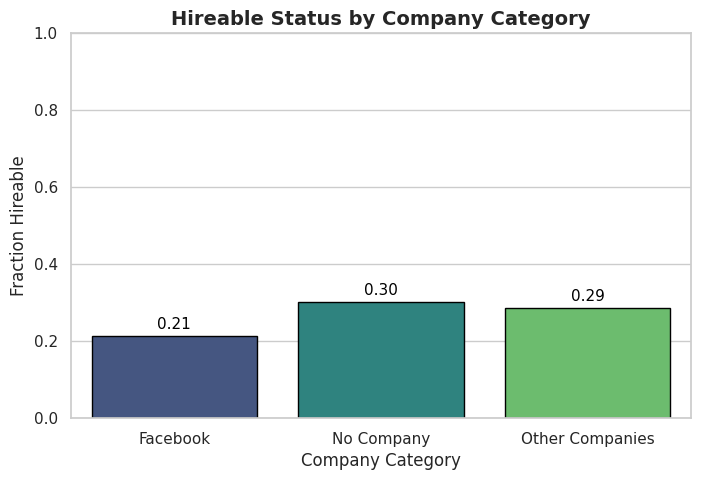

In [5]:
df["is_facebook"] = df["company"].str.contains("FACEBOOK", case=False, na=False)

df["company_category"] = df["company"].apply(
    lambda x: (
        "Facebook"
        if pd.notna(x) and "FACEBOOK" in x.upper()
        else ("No Company" if pd.isna(x) else "Other Companies")
    )
)

hireable_counts = df.groupby("company_category")["hireable"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

bar_plot = sns.barplot(
    data=hireable_counts,
    x="company_category",
    y="hireable",
    palette="viridis",
    edgecolor="black",
    hue="company_category",
)

bar_plot.set_xlabel("Company Category", fontsize=12)
bar_plot.set_ylabel("Fraction Hireable", fontsize=12)
bar_plot.set_title("Hireable Status by Company Category", fontsize=14, weight="bold")
bar_plot.set(ylim=(0, 1))

for p in bar_plot.patches:
    bar_plot.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="baseline",
        fontsize=11,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.show()

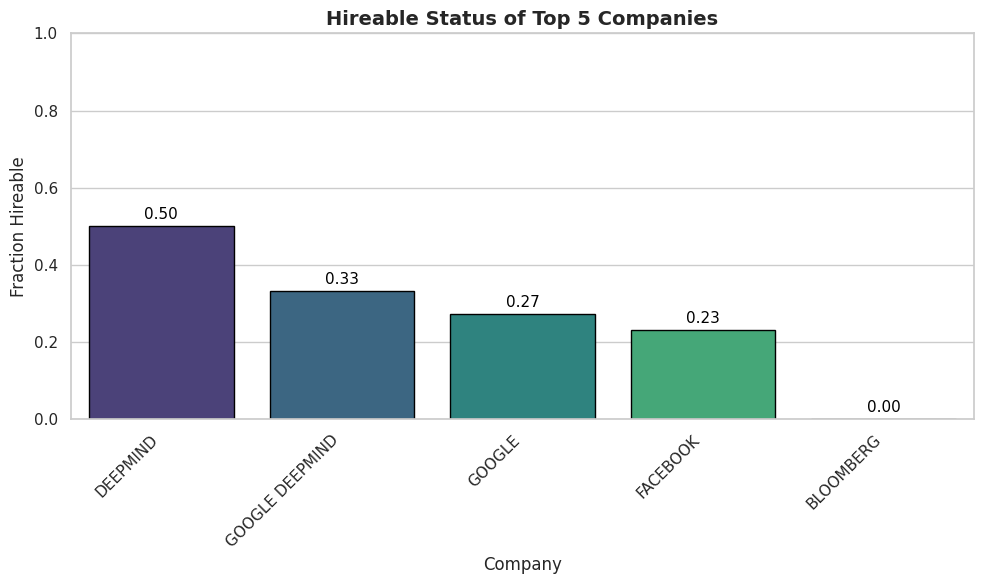

In [6]:
company_counts = df["company"].value_counts().reset_index()
company_counts.columns = ["company", "user_count"]

top_companies = company_counts.nlargest(5, "user_count")["company"]

top_company_data = df[df["company"].isin(top_companies)]

hireable_counts = (
    top_company_data.groupby("company")["hireable"].mean().reset_index()
)

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

bar_plot = sns.barplot(
    data=hireable_counts.sort_values(by="hireable", ascending=False),
    x="company",
    y="hireable",
    palette="viridis",
    edgecolor="black",
    hue="company",
)

bar_plot.set_xlabel("Company", fontsize=12)
bar_plot.set_ylabel("Fraction Hireable", fontsize=12)
bar_plot.set_title("Hireable Status of Top 5 Companies", fontsize=14, weight="bold")
bar_plot.set(ylim=(0, 1))
plt.xticks(rotation=45, ha="right")

for p in bar_plot.patches:
    bar_plot.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="baseline",
        fontsize=11,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.tight_layout()
plt.show()

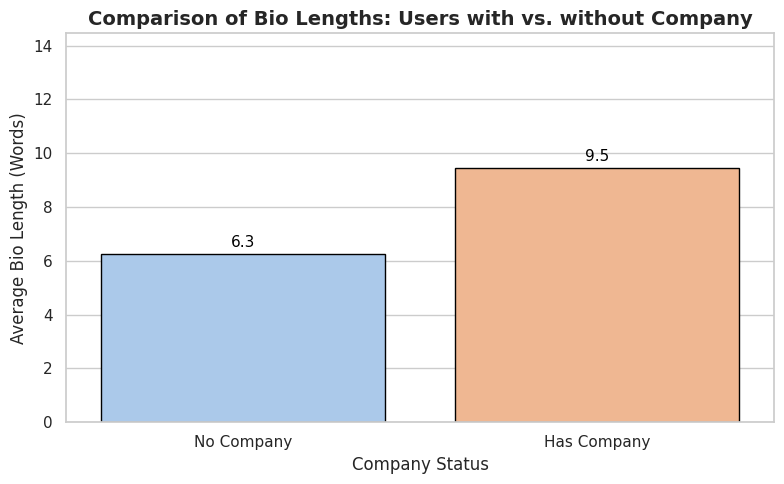

In [7]:
df["bio_length"] = df["bio"].str.split().str.len().fillna(0)
df["has_company"] = df["company"].notna() & (df["company"] != "")

avg_bio_length = df.groupby("has_company")["bio_length"].mean().reset_index()
avg_bio_length["has_company"] = avg_bio_length["has_company"].map(
    {True: "Has Company", False: "No Company"}
)

plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

bar_plot = sns.barplot(
    data=avg_bio_length,
    x="has_company",
    y="bio_length",
    palette="pastel",
    edgecolor="black",
    hue="has_company",
)

bar_plot.set_xlabel("Company Status", fontsize=12)
bar_plot.set_ylabel("Average Bio Length (Words)", fontsize=12)
bar_plot.set_title(
    "Comparison of Bio Lengths: Users with vs. without Company",
    fontsize=14,
    weight="bold",
)
plt.ylim(0, avg_bio_length["bio_length"].max() + 5)

for p in bar_plot.patches:
    bar_plot.annotate(
        f"{p.get_height():.1f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="baseline",
        fontsize=11,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.tight_layout()
plt.show()

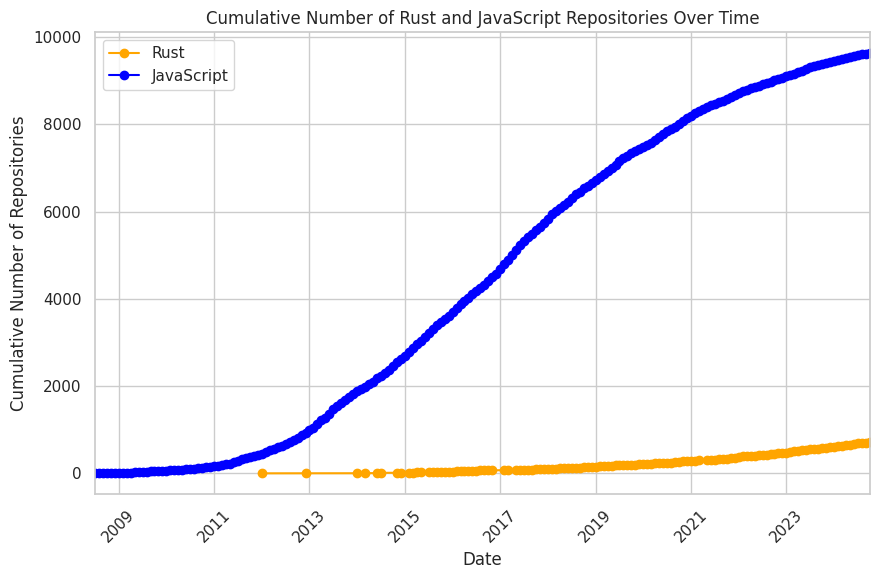

In [8]:
df = repos
df["created_at"] = pd.to_datetime(df["created_at"])

rust_repos = df[df["language"] == "Rust"]
js_repos = df[df["language"] == "JavaScript"]

rust_cumulative = (
    rust_repos.groupby(rust_repos["created_at"].dt.to_period("M")).size().cumsum()
)
js_cumulative = (
    js_repos.groupby(js_repos["created_at"].dt.to_period("M")).size().cumsum()
)

plt.figure(figsize=(10, 6))
rust_cumulative.plot(kind="line", marker="o", color="orange", label="Rust")
js_cumulative.plot(kind="line", marker="o", color="blue", label="JavaScript")

plt.title("Cumulative Number of Rust and JavaScript Repositories Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Number of Repositories")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.show()

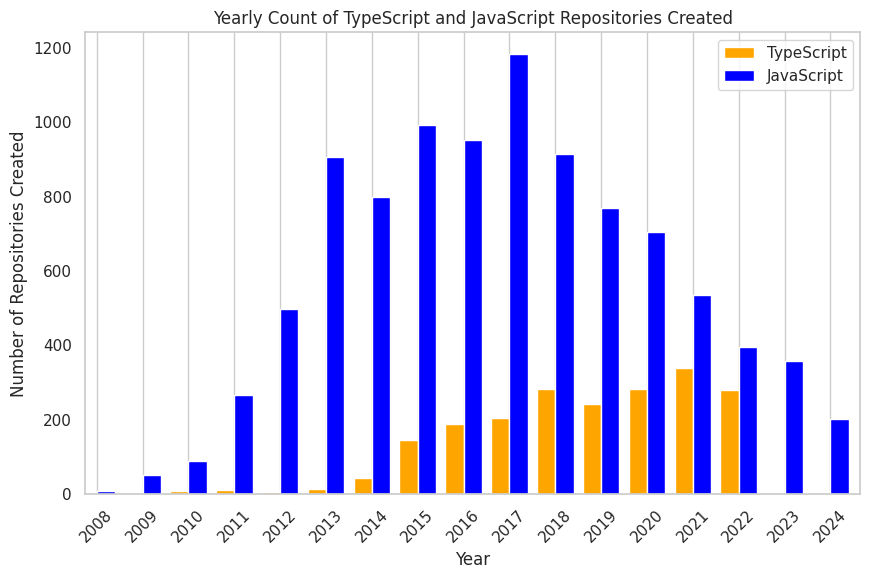

In [9]:
ts_repos = df[df["language"] == "TypeScript"]
js_repos = df[df["language"] == "JavaScript"]

ts_yearly = ts_repos.groupby(ts_repos["created_at"].dt.year).size()
js_yearly = js_repos.groupby(js_repos["created_at"].dt.year).size()

plt.figure(figsize=(10, 6))
ts_yearly.plot(kind="bar", color="orange", label="TypeScript", width=0.4, position=1)
js_yearly.plot(kind="bar", color="blue", label="JavaScript", width=0.4, position=0)

plt.title("Yearly Count of TypeScript and JavaScript Repositories Created")
plt.xlabel("Year")
plt.ylabel("Number of Repositories Created")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.legend()

plt.show()

<Figure size 1600x800 with 0 Axes>

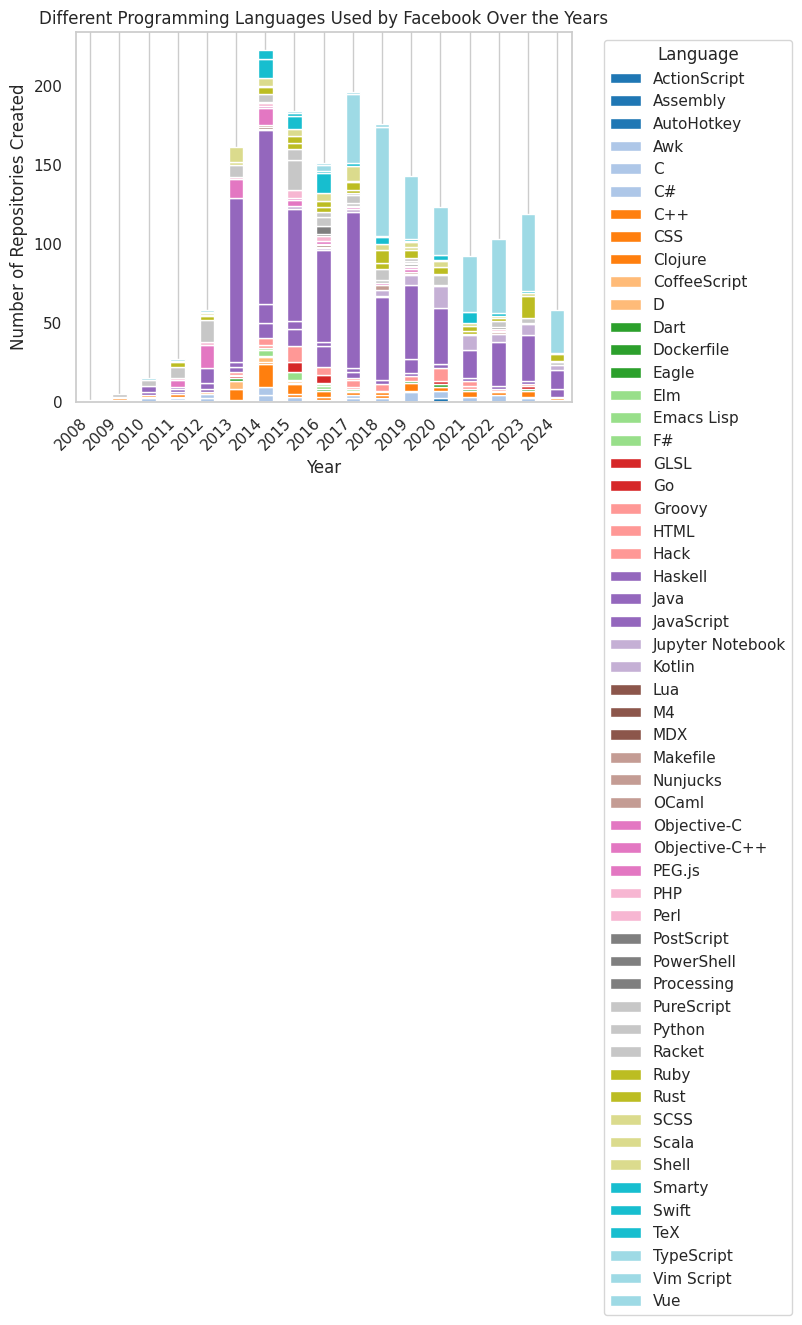

In [10]:
users_df = users

df["year"] = df["created_at"].dt.year

facebook_repos = df[df["login"].isin(facebook_users["login"])]

language_counts = (
    facebook_repos.groupby(["year", "language"]).size().unstack(fill_value=0)
)

plt.figure(figsize=(16, 8))
language_counts.plot(kind="bar", stacked=True, cmap="tab20")

plt.title("Different Programming Languages Used by Facebook Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Repositories Created")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")

plt.legend(title="Language", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout(pad=2.0)
plt.show()

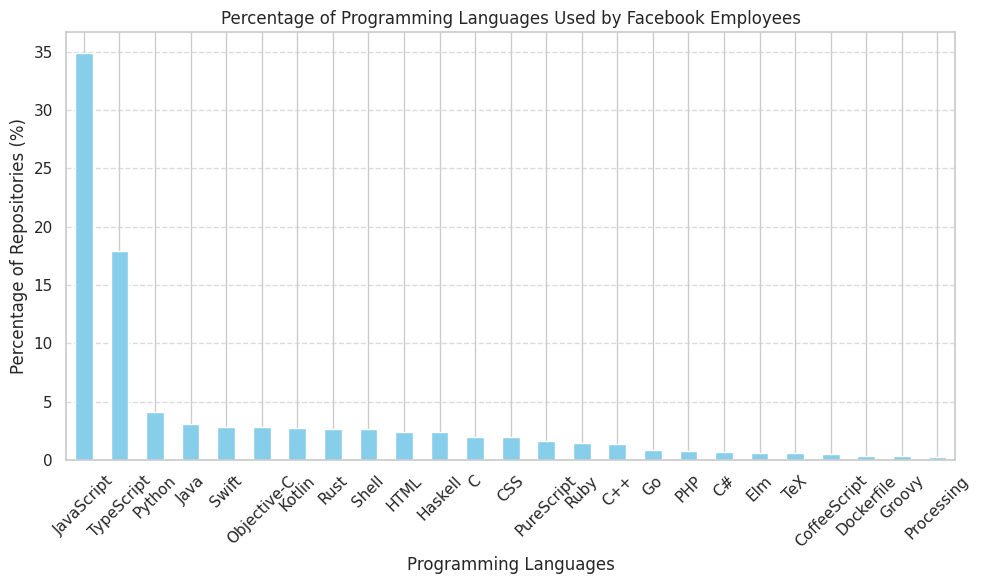

In [11]:
total_repos = len(facebook_repos)
language_counts = facebook_repos["language"].value_counts()

language_percentages = (language_counts / total_repos) * 100
language_percentages = language_percentages.fillna(0)

plt.figure(figsize=(10, 6))
language_percentages.nlargest(25).plot(kind="bar", color="skyblue")
plt.title("Percentage of Programming Languages Used by Facebook Employees")
plt.xlabel("Programming Languages")
plt.ylabel("Percentage of Repositories (%)")
plt.xticks(rotation=45)
plt.axhline(0, color="grey", linewidth=0.8)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()